In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics
import sklearn

In [2]:
Crime_data=pd.read_csv('crime_data.csv')
Crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
crime_data=Crime_data.drop('Unnamed: 0',axis=1)
crime_data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [24]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [25]:
crime_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [26]:
crime_data.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


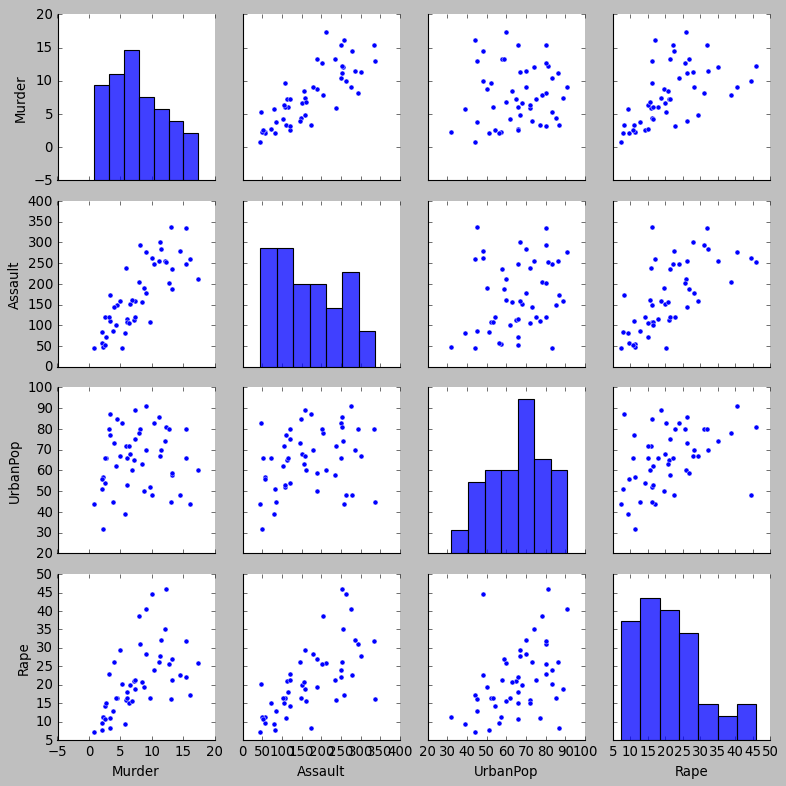

In [28]:
sns.pairplot(crime_data)

In [4]:
array=crime_data.values

In [5]:
stdscaler = StandardScaler().fit(array)
X = stdscaler.transform(array) 
X 

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

# DBSCAN

In [6]:
dbscan = DBSCAN(eps=0.90, min_samples=4)
dbscan.fit(X) 

DBSCAN(eps=0.9, min_samples=4)

In [7]:
dl=dbscan.labels_ 
dl

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0],
      dtype=int64)

In [8]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl.tail()

,cluster
45,0
46,-1
47,0
48,0
49,0


In [9]:
df = pd.concat([Crime_data,cl],axis=1) 

In [10]:
import matplotlib.pyplot as plt
>>> plt.style.use('classic')

Text(0.5, 1.0, 'Clusters using DBScan')

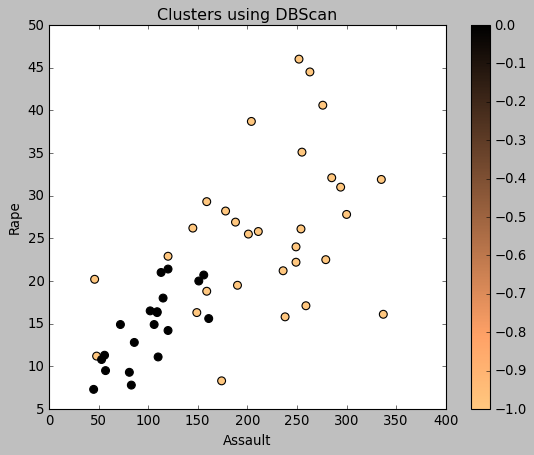

In [11]:
df.plot(x="Assault",y ="Rape",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using DBScan') 

In [12]:
sklearn.metrics.silhouette_score(X,dl)

0.266781916070482

# Hierarchical

In [13]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch 

Text(0.5, 1.0, 'dendrogram')

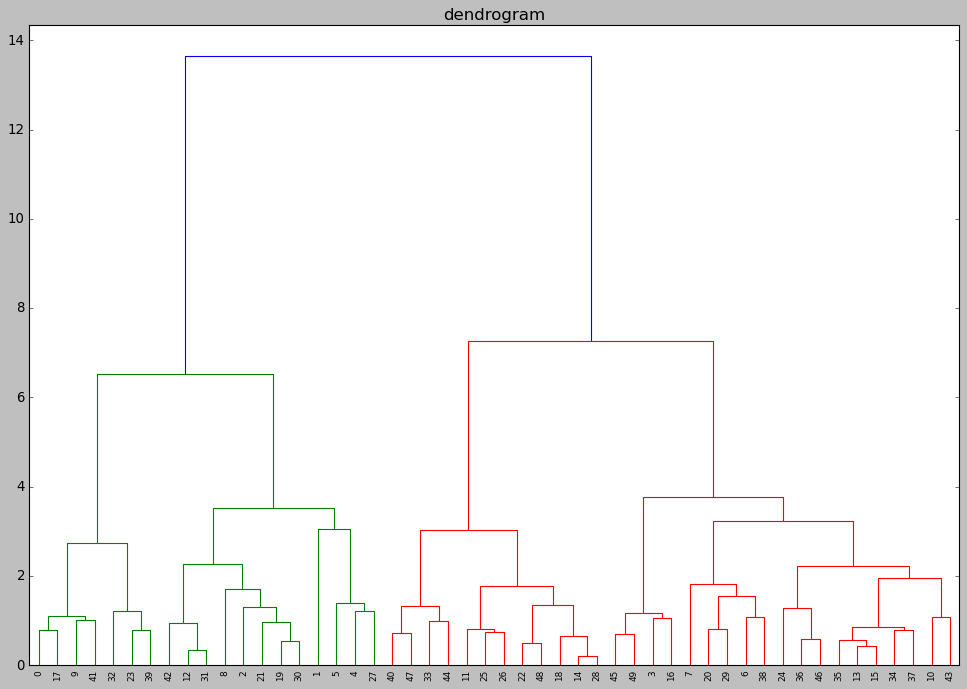

In [14]:
fig=plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('dendrogram',size=15)

In [15]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=2, linkage='complete',affinity = "euclidean").fit(X) 

In [16]:
hc = h_complete.fit_predict(X)

In [17]:
shs1=metrics.silhouette_score(X,hc)
shs1

0.4047944502519567

# KMeans clustering

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


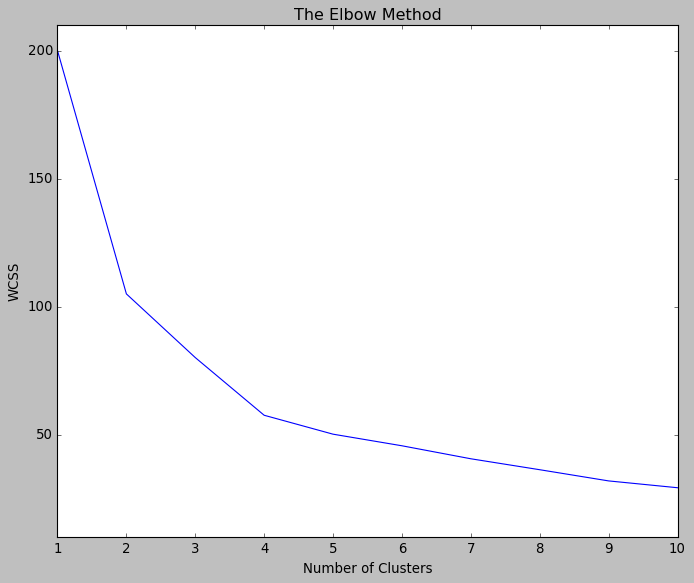

In [18]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(X)
    WCSS.append(clf.inertia_) 
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.ylim(10,210)
plt.show()  

In [19]:
WCSS

[200.0,
 104.96163315756873,
 80.08569526137276,
 57.55425863091106,
 50.16335813593606,
 45.63396057810246,
 40.55736786098163,
 36.28233725516991,
 31.91047580166259,
 29.246394387720432]

In [20]:
Clf = KMeans(n_clusters=4)
y_Kmeans = Clf.fit_predict(X) 

In [21]:
y_Kmeans

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       0, 3, 1, 2, 0, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

In [22]:
Clf.cluster_centers_ 

array([[-0.549972  , -0.45634975,  0.50510391, -0.30123345],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.96708598, -1.13648381, -1.09083666, -1.04566193],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669]])

In [23]:
S2=metrics.silhouette_score(X,y_Kmeans)
S2

0.33991629616899205